In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models import hopf

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.fitparams as fp

In [3]:
CmatFilenames = glob.glob("../../interareal/data/greifswald_data/NAP_*/SC/Unnormalized/DTI_CM.mat")
Cmat = ld.loadDataset(CmatFilenames, key='sc')
DmatFilenames = glob.glob("../../interareal/data/greifswald_data/NAP_*/SC/Unnormalized/DTI_LEN.mat")
Dmat = ld.loadDataset(DmatFilenames, key='len')
BOLDFilenames = glob.glob("../../interareal/data/greifswald_data/NAP_*/FC/TC.mat")
FCs = ld.loadDataset(BOLDFilenames, key='tc', average=False, apply_function=func.fc)
FCDs = ld.loadDataset(BOLDFilenames, key='tc', average=False, \
                      apply_function=func.fcd, apply_function_kwargs={"stepsize" : 10})

In [4]:
hopfModel = hopf.HopfModel(Cmat = Cmat, Dmat = Dmat, simulateChunkwise=False)

In [5]:
#hopfModel.params['w'] = 0.2 # ~ 25 Hz
hopfModel.params['signalV'] = 0 # signal speed: mm/ms
hopfModel.params['duration'] = 10 * 1000 
hopfModel.params['sigma_ou'] = 0.14
hopfModel.params['K_gl'] = 0.6

hopfModel.run()

Text(0.5, 0, 't [ms]')

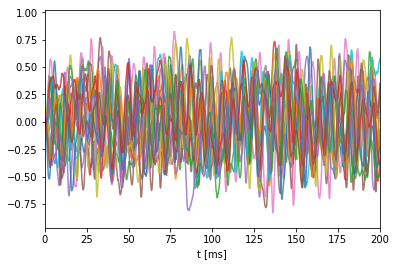

In [6]:
plt.plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

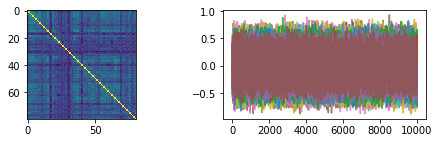

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(hopfModel.x[:, -10000:]))
axs[1].plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);

In [8]:
scores = []
for i in range(len(FCs)):
    fc_score = func.matrix_correlation(func.fc(hopfModel.x[:, -int(5000/hopfModel.params['dt']):]), FCs[i])
    scores.append(fc_score)
    print("Subject {}: {:.2f}". format(i, fc_score))
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Subject 0: 0.57
Subject 1: 0.56
Subject 2: 0.50
Subject 3: 0.58
Subject 4: 0.60
Subject 5: 0.67
Subject 6: 0.50
Subject 7: 0.63
Subject 8: 0.57
Subject 9: 0.57
Subject 10: 0.61
Mean FC/FC correlation: 0.58
